In [17]:
import pandas as pd
import numpy as np

from scipy.stats import beta
from sklearn.preprocessing import StandardScaler

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns

import missingno as msno

%matplotlib inline

pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=1000, linewidth=150, precision=3, edgeitems=20, suppress=1)

In [2]:
root = 'D:/data/optiver/'
book_train = np.load(root+'cache/optiver_tensors.npz')['book_train']

# time_id  seconds_in_bucket  bid_price1  ask_price1  bid_price2  ask_price2  bid_size1  ask_size1  bid_size2  ask_size2 stock_id

In [62]:
truth = pd.read_csv(root+'train.csv')
kk = truth.iloc[:10]
kk

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
5,0,72,0.004912
6,0,97,0.009388
7,0,103,0.004120
8,0,109,0.002182
9,0,123,0.002669


In [64]:
stockids = np.unique(truth.stock_id)
timeids  = np.unique(truth.time_id)

thematrix = np.empty((len(stockids),len(timeids)))
thematrix[:] = np.nan

In [ ]:
for sid in stockids:

    subdf = truth.loc[truth.stock_id == sid]
    thematrix[sid,truth.time_id] = subdf

In [65]:
example = book_train[(book_train[:,-1]==77.) & (book_train[:,0]==24600.)]

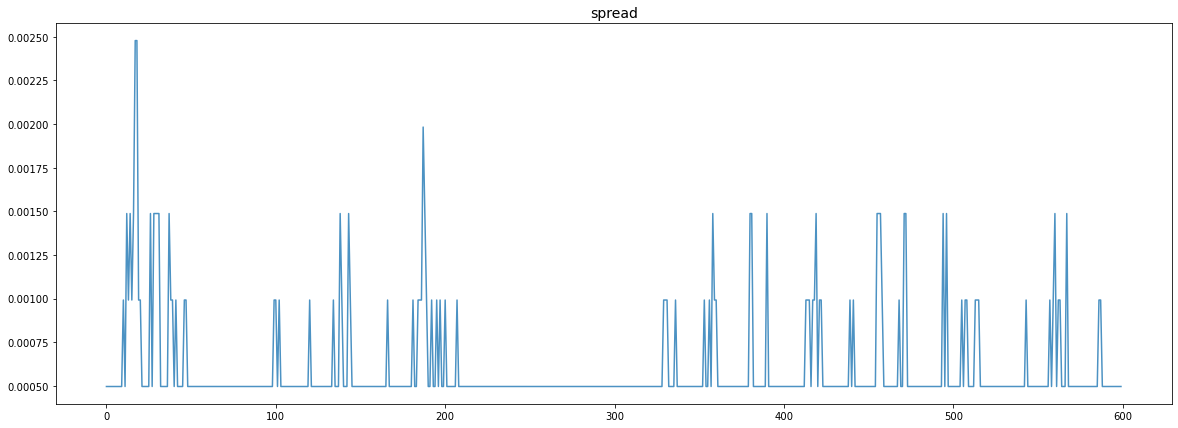

In [66]:
fig, ax1 = plt.subplots(1,1,figsize=(20,7))

ax1.set_title('spread',fontsize=14)
ax1.plot(example[:,3]-example[:,2], alpha=.8)

plt.show()

In [5]:
df = pd.read_parquet('D:/data/optiver/trade_train.parquet/stock_id=0/ef805fd82ff54fadb363094e3b122ab9.parquet', engine='pyarrow')

In [6]:
np.unique(df.time_id, return_counts=True)

(array([    5,    11,    16, ..., 32758, 32763, 32767], dtype=int16),
 array([40, 30, 25, ..., 36, 53, 29], dtype=int64))

In [7]:
test = df[df.time_id == 11].reset_index(drop=True)
test

,time_id,seconds_in_bucket,price,size,order_count
0,11,0,0.999824,2,2
1,11,18,0.999925,1,1
2,11,28,0.999925,1,1
3,11,64,0.999724,1,1
4,11,75,1.000025,110,2
5,11,131,0.999925,1,1
6,11,164,0.999990,29,3
7,11,184,0.999875,20,1
8,11,202,0.999975,2,2
9,11,246,0.999724,3,1


In [24]:
test = test.reindex(list(range(0, 597))).reset_index(drop=True)
test

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,11.0,0.0,0.999473,1.000176,0.999423,1.000376,205.0,100.0,20.0,30.0
1,11.0,3.0,0.999473,1.000176,0.999423,1.000376,200.0,100.0,20.0,30.0
2,11.0,13.0,0.999473,1.000326,0.999423,1.000376,200.0,100.0,20.0,30.0
3,11.0,18.0,0.999473,1.000025,0.999423,1.000376,200.0,100.0,20.0,30.0
4,11.0,28.0,0.999473,1.000326,0.999423,1.000376,200.0,100.0,20.0,30.0
...,...,...,...,...,...,...,...,...,...,...
592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_trade = pd.read_parquet('D:/data/optiver/trade_train.parquet/stock_id=0/ef805fd82ff54fadb363094e3b122ab9.parquet', engine='pyarrow')

In [7]:
df_trade[df_trade.time_id == 11]

,time_id,seconds_in_bucket,price,size,order_count
40,11,0,0.999824,2,2
41,11,18,0.999925,1,1
42,11,28,0.999925,1,1
43,11,64,0.999724,1,1
44,11,75,1.000025,110,2
45,11,131,0.999925,1,1
46,11,164,0.999990,29,3
47,11,184,0.999875,20,1
48,11,202,0.999975,2,2
49,11,246,0.999724,3,1
